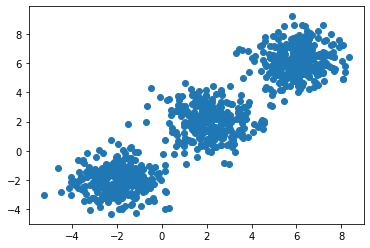

In [52]:
from utils import plot_svm_margins
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

blobs = make_blobs((300,300,300), 3, centers = [(-2,-2), (2,2), (6,6)], random_state= 42)[0]

plt.scatter(blobs[:,0], blobs[:,1])

In [53]:
from sklearn.cluster import KMeans

kmean = KMeans(3)
kmean.fit(blobs)

blobs = np.c_[blobs, kmean.predict(blobs)]

blobs


array([[4.44575198, 2.12922118, 2.        ],
       [7.21715852, 7.52131605, 0.        ],
       [1.38721131, 1.61229844, 2.        ],
       ...,
       [6.91358463, 5.19682105, 0.        ],
       [4.57818933, 7.50133365, 0.        ],
       [2.27157884, 0.72325142, 2.        ]])

<AxesSubplot:xlabel='K1', ylabel='K2'>

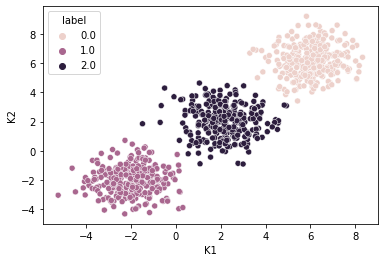

In [54]:
df_blobs = pd.DataFrame(blobs, columns= ['K1', 'K2', 'label'])
sns.scatterplot(data = df_blobs, x = 'K1', y = 'K2', hue = 'label')

In [55]:
def binarize_kmeans (x):
    if x == 1 or x == 0 :
        return 0
    else:
        return 1


df_blobs["binarized"] = df_blobs["label"].apply(binarize_kmeans)
df_blobs.drop("label", axis = 1, inplace= True)
df_blobs

,K1,K2,binarized
0,4.445752,2.129221,1
1,7.217159,7.521316,0
2,1.387211,1.612298,1
3,-2.151785,-1.411683,0
4,6.490975,6.734878,0
...,...,...,...
895,4.934886,5.694775,0
896,3.503398,2.877362,1
897,6.913585,5.196821,0
898,4.578189,7.501334,0


<AxesSubplot:xlabel='K1', ylabel='K2'>

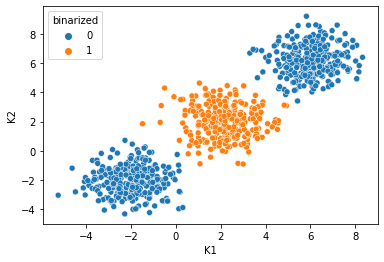

In [56]:
sns.scatterplot(data = df_blobs, x = 'K1', y = 'K2', hue = 'binarized')

In [57]:
X, y = df_blobs.drop('binarized', axis = 1).to_numpy(), df_blobs['binarized']

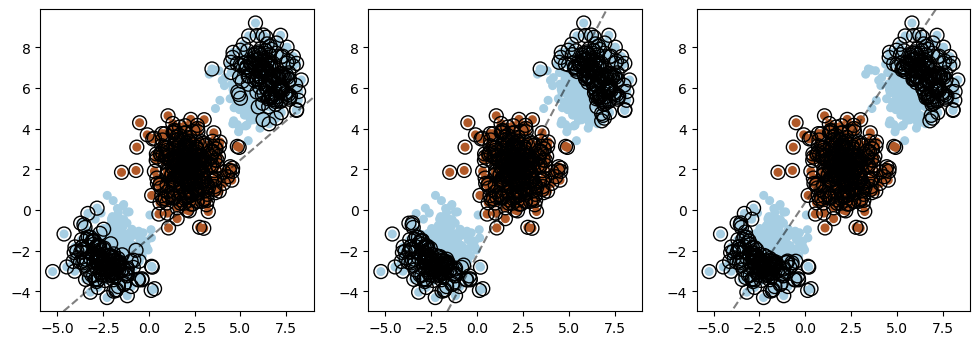

In [58]:
fig, ax = plt.subplots(1,3, dpi = 100, figsize = (12,4))

for i, C in enumerate([10, .1, .01], 1):
    plt.subplot(1,3,i)
    classifier = SVC(kernel = 'linear', C = C)
    plot_svm_margins(classifier, X, y)

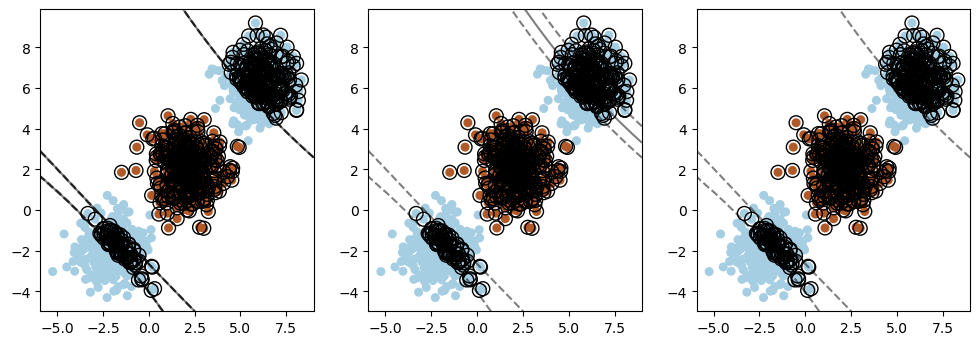

In [59]:
fig, ax = plt.subplots(1,3, dpi = 100, figsize = (12,4))

for i, C in enumerate([10, .1, .01], 1):
    plt.subplot(1,3,i)
    classifier = SVC(kernel = 'sigmoid', C = C)
    plot_svm_margins(classifier, X, y)

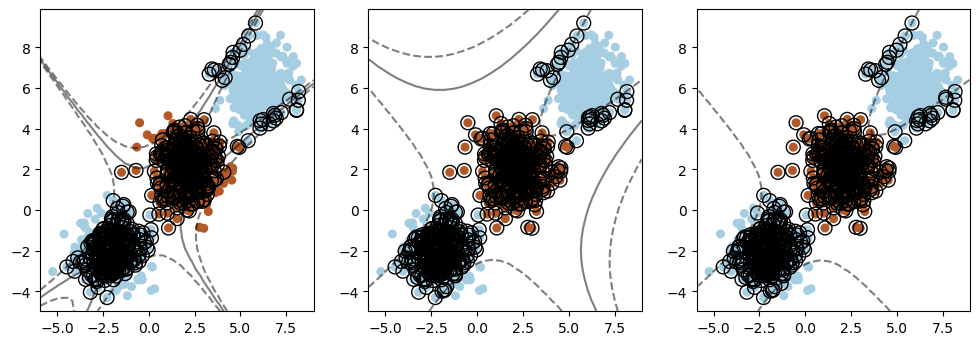

In [61]:
fig, ax = plt.subplots(1,3, dpi = 100, figsize = (12,4))

for i, C in enumerate([10, .1, .01], 1):
    plt.subplot(1,3,i)
    classifier = SVC(kernel = 'poly', C = C)
    plot_svm_margins(classifier, X, y)

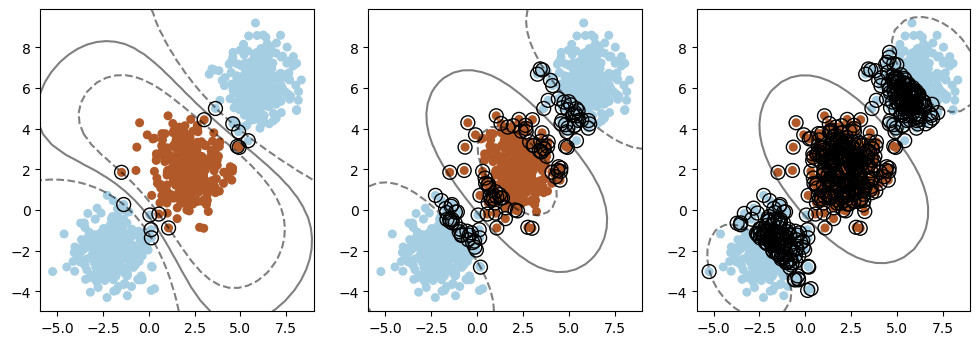

In [60]:
fig, ax = plt.subplots(1,3, dpi = 100, figsize = (12,4))


for i, C in enumerate([10, .1, .01], 1):
    plt.subplot(1,3,i)
    classifier = SVC(kernel = 'rbf', C = C)
    plot_svm_margins(classifier, X, y)